In [11]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Read the dataset
df = pd.read_csv('height-weight.csv')

In [13]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


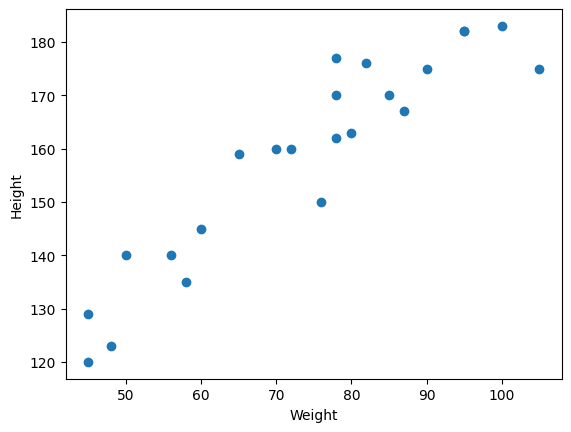

In [14]:
#Scatter Plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [15]:
#Correlation Matrix
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


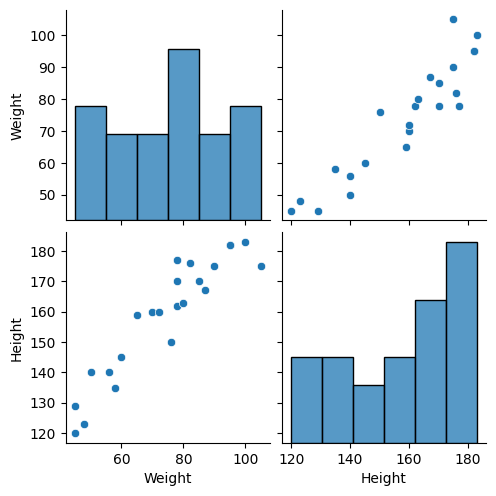

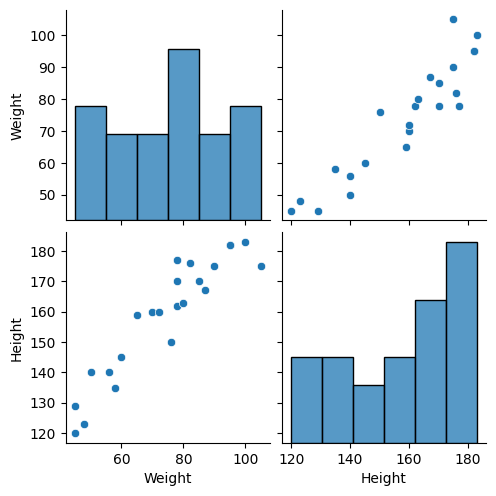

In [ ]:
# Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [17]:
#Dependent and Independent features
X = df[['Weight']]
y = df['Height']

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
#Only transform is done here to prevent Data Leakage. The scaler will use the mean and std dev
#of the training set itself.
X_test = scaler.transform(X_test)

In [25]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
## The Coefficients and Slope
print(f'Coefficient or Slope: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

Coefficient or Slope: [17.2982057]
Intercept: 156.47058823529412


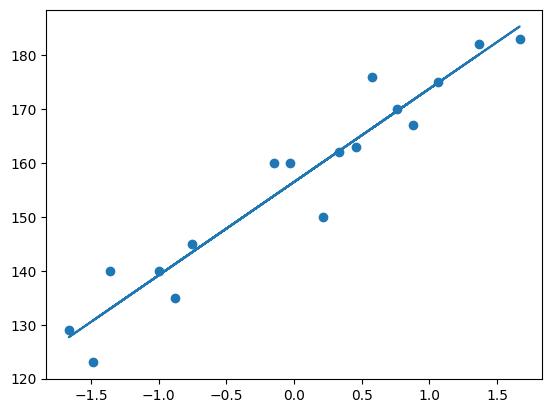

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [35]:
## Prediction for Test data
y_pred = regression.predict(X_test)

In [36]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605


In [38]:
from sklearn.metrics import r2_score

In [40]:
score = r2_score(y_test, y_pred)
print(f'R-squared: {score}')

R-squared: 0.7360826717981276


In [41]:
## Adjusted R-squared
adj_r2 = 1 - ((1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(f'Adj. R-squared: {adj_r2}')

Adj. R-squared: 0.6701033397476595


In [43]:
## OLS Regression
import statsmodels.api as sm

In [44]:
model = sm.OLS(y_train, X_train).fit()

In [45]:
prediction = model.predict(X_test)
print(f'OLS Prediction: {prediction}')

OLS Prediction: [  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [46]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 29 Dec 2024   Prob (F-statistic):                       0.664
Time:                        19:52:56   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/sudhanvabharadwaj/Desktop/ML and NLP Bootcamp/Python Bootcamp/pyenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [48]:
regression.predict(scaler.transform([[72]]))

/Users/sudhanvabharadwaj/Desktop/ML and NLP Bootcamp/Python Bootcamp/pyenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])